In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import sklearn.gaussian_process as gp
from sklearn.metrics import mean_squared_error
np.random.seed(1)

In [2]:
def f(x):
    return x*np.sin(x)

In [3]:
x_train = np.atleast_2d([1,3,5,6,7,8]).T

y_train = f(x_train).ravel()

x_test = np.atleast_2d(np.linspace(0,10,1000)).T

y_test = f(x_test).ravel()

In [4]:
print(x_train.shape, y_train.shape)
kernel = gp.kernels.ConstantKernel(1.0, (1e-3, 1e3)) * gp.kernels.RBF(10.0, (1e-2, 1e2))

model = gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

model.fit(x_train, y_train)

y_pred, sigma = model.predict(x_test, return_std=1)

(6, 1) (6,)


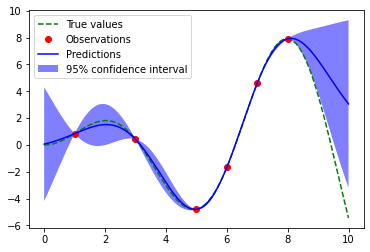

In [5]:
plt.figure()
plt.plot(x_test, y_test, 'g--', label='True values')
plt.plot(x_train, y_train, 'ro', label="Observations")
plt.plot(x_test, y_pred, 'b-', label='Predictions')
plt.fill(np.concatenate([x_test, x_test[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                         (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='blue', ec='None', label='95% confidence interval')
plt.legend()
plt.show()

In [6]:
df = pd.read_csv('testing.csv', sep=r'\s*,\s*', header=0, engine='python')
df.head()

,x,y
0,7,170.857523
1,8,170.487173
2,10,170.336920
3,20,168.406835
4,40,165.519875


In [19]:
X = df['x']
print(X)
Y = df['y']
print(Y)

0     7
1     8
2    10
3    20
4    40
Name: x, dtype: int64
0    170.857523
1    170.487173
2    170.336920
3    168.406835
4    165.519875
Name: y, dtype: float64


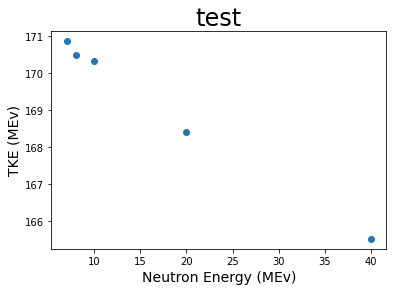

In [20]:
plt.title('test',fontsize=24)
plt.xlabel("Neutron Energy (MEv)", fontsize=14)
plt.ylabel("TKE (MEv)", fontsize=14)
plt.scatter(X, Y, label='test')
plt.show()

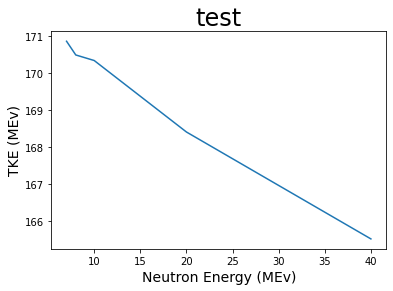

In [21]:
plt.title('test',fontsize=24)
plt.xlabel("Neutron Energy (MEv)", fontsize=14)
plt.ylabel("TKE (MEv)", fontsize=14)
plt.plot(X, Y, label='test')
plt.show()

In [22]:
X = np.atleast_2d(X.to_numpy()).T
X

array([[ 7],
       [ 8],
       [10],
       [20],
       [40]])

In [23]:
x = np.atleast_2d(np.linspace(5,50,1000)).T

In [24]:
kernel = gp.kernels.ConstantKernel(1.0, (1e-3, 1e3)) * gp.kernels.RBF(10.0, (1e-2, 1e2))
model_new = gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

In [25]:
model_new.fit(X,Y)

/Users/unubolderdenebeleg/school/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=10),
                         n_restarts_optimizer=9)

In [26]:
y_pred, sigma = model_new.predict(x, return_std=1)

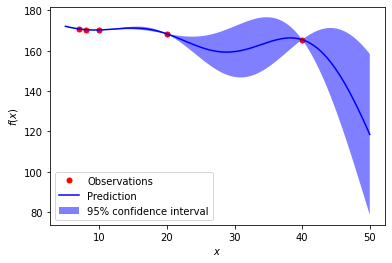

In [27]:
plt.figure()
plt.plot(X,Y,'r.',markersize=10,label='Observations')
plt.plot(x,y_pred,'b-',label='Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                         (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='blue', ec='None', label='95% confidence interval')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()

In [28]:
print(X, Y)

[[ 7]
 [ 8]
 [10]
 [20]
 [40]] 0    170.857523
1    170.487173
2    170.336920
3    168.406835
4    165.519875
Name: y, dtype: float64
